# Problemas de la Regresión Lineal

## El tratamiento de las variables categóricas

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("C:/Users/Acer Nitro 5/Documents/Python Scripts/ML/datasets/ecom-expense/Ecom Expense.csv")
df.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


In [3]:
dummy_gender = pd.get_dummies(df["Gender"], prefix = "Gender")
dummy_city_tier = pd.get_dummies(df["City Tier"], prefix = "City")

In [4]:
dummy_gender.head()

,Gender_Female,Gender_Male
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [5]:
dummy_city_tier.head()

,City_Tier 1,City_Tier 2,City_Tier 3
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


In [6]:
column_names = df.columns.values.tolist()
column_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

In [7]:
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0


In [8]:
df_new = df_new[column_names].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0


In [9]:
feature_cols = ["Monthly Income", "Transaction Time", 
                "Gender_Female", "Gender_Male", 
                "City_Tier 1", "City_Tier 2", "City_Tier 3",
                "Record"]

In [10]:
X = df_new[feature_cols]
Y = df_new["Total Spend"]

In [11]:
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression()

In [12]:
print(lm.intercept_)
print(lm.coef_)

-79.41713030137453
[ 1.47538980e-01  1.54946125e-01 -1.31025013e+02  1.31025013e+02
  7.67643260e+01  5.51389743e+01 -1.31903300e+02  7.72233446e+02]


In [13]:
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.14753898049205744),
 ('Transaction Time', 0.154946125495895),
 ('Gender_Female', -131.02501325554584),
 ('Gender_Male', 131.02501325554596),
 ('City_Tier 1', 76.76432601049525),
 ('City_Tier 2', 55.13897430923255),
 ('City_Tier 3', -131.90330031972792),
 ('Record', 772.2334457445648)]

In [14]:
lm.score(X,Y)

0.9179923586131016

In [15]:
 -79.41713030137362 + 131.02501325554596 - 131.90330031972792

-80.29541736555558

In [18]:
df_new["prediction"] = -79.41713030137453 + df_new['Monthly Income'] * 0.14753898049205744 + df_new['Transaction Time'] * 0.154946125495895 + df_new['Gender_Female'] * (-131.02501325554584) + df_new['Gender_Male'] * 131.02501325554596 + df_new['City_Tier 1'] * 76.76432601049525 + df_new['City_Tier 2'] * 55.13897430923255 + df_new['City_Tier 3']* (-131.90330031972792) + df_new['Record']* 772.2334457445648
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,prediction
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0,3581.980335


In [19]:
SSD = np.sum((df_new["prediction"] - df_new["Total Spend"])**2)
SSD

1517733985.340816

In [20]:
RSE = np.sqrt(SSD/(len(df_new)-len(feature_cols)-1))
RSE

803.1318809818165

In [21]:
sales_mean = np.mean(df_new["Total Spend"])
sales_mean

6163.176415976715

In [22]:
error = RSE/sales_mean
error

0.1303113568029416

## Eliminar variables dummy redundantes

In [23]:
dummy_gender = pd.get_dummies(df["Gender"], prefix="Gender").iloc[:,1:]
dummy_gender.head()

,Gender_Male
0,0
1,0
2,1
3,0
4,0


In [24]:
dummy_city_tier = pd.get_dummies(df["City Tier"], prefix="City").iloc[:,1:]
dummy_city_tier.head()

,City_Tier 2,City_Tier 3
0,0,0
1,1,0
2,1,0
3,0,0
4,1,0


In [25]:
column_names = df.columns.values.tolist()
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()
df_new = df_new[column_names].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Male,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,0,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,1,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,0,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,0,1,0


In [26]:
feature_cols = ["Monthly Income", "Transaction Time", "Gender_Male", "City_Tier 2", "City_Tier 3", "Record"]
X = df_new[feature_cols]
Y = df_new["Total Spend"]
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression()

In [27]:
print(lm.intercept_)

-133.67781754642238


In [28]:
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.14753898049205746),
 ('Transaction Time', 0.1549461254958972),
 ('Gender_Male', 262.05002651109595),
 ('City_Tier 2', -21.62535170126301),
 ('City_Tier 3', -208.66762633022316),
 ('Record', 772.2334457445637)]

In [29]:
lm.score(X,Y)

0.9179923586131016

Coeficientes con todas las variables en el modelo

* ('Monthly Income', 0.14753898049205738),
* ('Transaction Time', 0.15494612549589545),
* ('Gender_Female', -131.02501325554567),
* ('Gender_Male', 131.0250132555456),
* ('City_Tier 1', 76.76432601049527),
* ('City_Tier 2', 55.138974309232474),
* ('City_Tier 3', -131.9033003197278),
* ('Record', 772.2334457445648)

Coeficientes tras enmascarar las variables dummy pertinentes

* ('Monthly Income', 0.14753898049205744),
* ('Transaction Time', 0.15494612549589631),
* ('Gender_Male', 262.05002651109595),
* ('City_Tier 2', -21.62535170126296),
* ('City_Tier 3', -208.66762633022324),
* ('Record', 772.2334457445635)]

Los cambios se reflejan en

* Gender_Male:
    * antes -> 131.02,
    * después -> 262.05 = ( 131.02 - (-131.02))
* Gender_Female:
    * antes -> -131.02,
    * después -> 0
* CT1:
    * antes -> 76.76,
    * después -> 0
* CT2:
    * antes -> 55.13,
    * después -> -21.62 = (55.13 - 76.76)
* CT3:
    * antes -> -131.90,
    * después -> -208.66 = (-131.90 - 76.76)

## Transformación de variables para conseguir una relación no lineal

In [30]:
import pandas as pd

In [31]:
data_auto = pd.read_csv("C:/Users/Acer Nitro 5/Documents/Python Scripts/ML/datasets/auto/auto-mpg.csv")
data_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [32]:
data_auto.shape

(406, 9)

In [33]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'CV vs MPG')

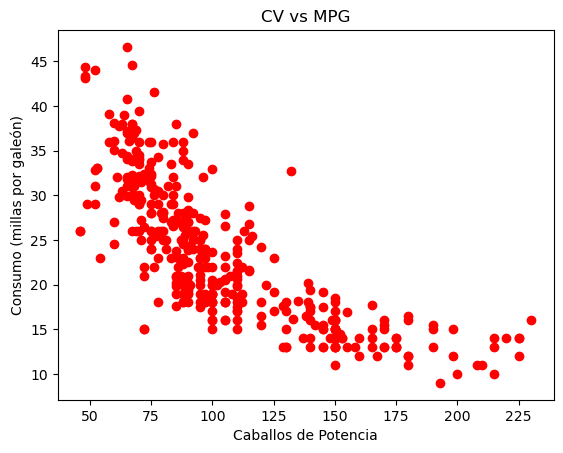

In [34]:
%matplotlib inline
data_auto["mpg"] = data_auto["mpg"].dropna()
data_auto["horsepower"] = data_auto["horsepower"].dropna()
plt.plot(data_auto["horsepower"], data_auto["mpg"], "ro")
plt.xlabel("Caballos de Potencia")
plt.ylabel("Consumo (millas por galeón)")
plt.title("CV vs MPG")

## Modelo de regresión lineal

In [35]:
X = data_auto["horsepower"].fillna(data_auto["horsepower"].mean()).to_numpy()
Y = data_auto["mpg"].fillna(data_auto["mpg"].mean())
X_data = X[:,np.newaxis]

In [36]:
lm = LinearRegression()
lm.fit(X_data,Y)

LinearRegression()

In [37]:
type(X)

numpy.ndarray

In [38]:
type(X_data)

numpy.ndarray

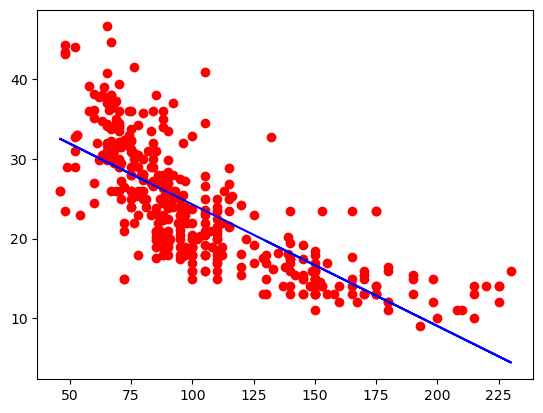

In [39]:
%matplotlib inline
plt.plot(X,Y, "ro")
plt.plot(X, lm.predict(X_data), color="blue")

In [40]:
lm.score(X_data, Y)

0.574653340645025

In [41]:
SSD = np.sum((Y - lm.predict(X_data))**2)
RSE = np.sqrt(SSD/(len(X_data)-1))
y_mean = np.mean(Y)
error = RSE/y_mean
SSD, RSE, y_mean, error*100

(10315.75196006092, 5.046879480825511, 23.514572864321607, 21.462773361633474)

## Modelo de regresión cuadrático

In [42]:
X_data = X**2
X_data = np.asarray(X_data)
X_data = X_data[:,np.newaxis]

In [43]:
lm = LinearRegression()
lm.fit(X_data, Y)

LinearRegression()

In [45]:
lm.score(X_data, Y)

0.4849887034823205

In [46]:
SSD = np.sum((Y - lm.predict(X_data))**2)
RSE = np.sqrt(SSD/(len(X_data)-1))
y_mean = np.mean(Y)
error = RSE/y_mean
SSD, RSE, y_mean, error*100

(12490.350340501926, 5.553410772769817, 23.514572864321607, 23.616889852998113)

## Modelo de regresión lineal y cuadrático

In [47]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [48]:
poly = PolynomialFeatures(degree=2)

In [49]:
X = np.asarray(X)
X_data = poly.fit_transform(X[:,np.newaxis])

In [50]:
lm = linear_model.LinearRegression()
lm.fit(X_data, Y)

LinearRegression()

In [51]:
lm.score(X_data, Y)

0.6439066584257469

In [52]:
lm.intercept_

55.02619244708036

In [53]:
lm.coef_

array([ 0.        , -0.43404318,  0.00112615])

In [54]:
def regresion_validation(X_data, Y, Y_pred):
    SSD = np.sum((Y - Y_pred)**2)
    RSE = np.sqrt(SSD/(len(X_data)-1))
    y_mean = np.mean(Y)
    error = RSE/y_mean
    print("SSD: "+str(SSD)+", RSE: " +str(RSE) + ", Y_mean: " +str(y_mean) +", error: " + str(error*100)+ "%")

In [55]:
for d in range(2,12):
    poly = PolynomialFeatures(degree=d)
    X_data = poly.fit_transform(X[:,np.newaxis])
    lm = linear_model.LinearRegression()
    lm.fit(X_data, Y)
    print("Regresión de grado "+str(d))
    print("R2:" +str(lm.score(X_data, Y)))
    print(lm.intercept_)
    print(lm.coef_)
    regresion_validation(X_data, Y, lm.predict(X_data))

Regresión de grado 2
R2:0.6439066584257469
55.02619244708036
[ 0.         -0.43404318  0.00112615]
SSD: 8636.180643524502, RSE: 4.61778115803654, Y_mean: 23.514572864321607, error: 19.6379546619069%
Regresión de grado 3
R2:0.6444678885560744
58.448774111918084
[ 0.00000000e+00 -5.27113167e-01  1.89736722e-03 -1.95723195e-06]
SSD: 8622.56936742855, RSE: 4.614140736300908, Y_mean: 23.514572864321607, error: 19.622473106036686%
Regresión de grado 4
R2:0.6467674189704502
40.09664385021006
[ 0.00000000e+00  1.62563541e-01 -7.10892744e-03  4.65580255e-05
 -9.15840093e-08]
SSD: 8566.799832491353, RSE: 4.5991947315797574, Y_mean: 23.514572864321607, error: 19.55891250126879%
Regresión de grado 5
R2:0.6547512490680012
-40.693829806443105
[ 0.00000000e+00  4.00021432e+00 -7.54801920e-02  6.19621368e-04
 -2.36220932e-06  3.41982976e-09]
SSD: 8373.171390451864, RSE: 4.546921734577689, Y_mean: 23.514572864321607, error: 19.336612069516608%
Regresión de grado 6
R2:0.6572895594960777
-157.06800547952

## El problema de los outliers

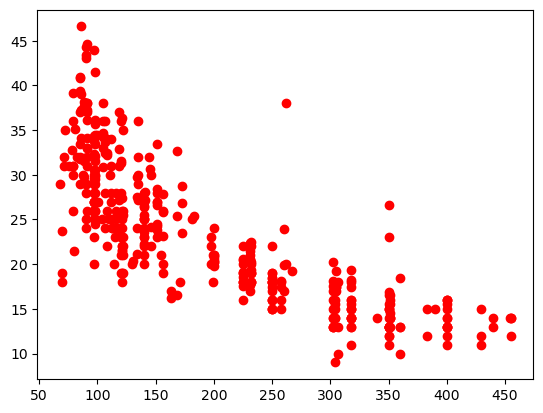

In [56]:
plt.plot(data_auto["displacement"], data_auto["mpg"], "ro")

In [57]:
X = data_auto["displacement"].fillna(data_auto["displacement"].mean()).to_numpy()
X = X[:,np.newaxis]
Y = data_auto["mpg"].fillna(data_auto["mpg"].mean())

lm = LinearRegression()
lm.fit(X, Y)

LinearRegression()

In [58]:
lm.score(X,Y)

0.6261049762826918

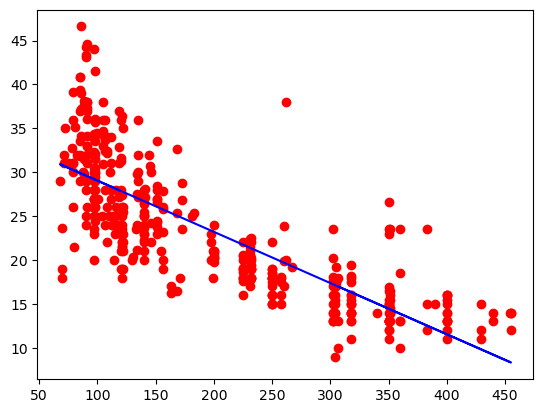

In [59]:
%matplotlib inline
plt.plot(X,Y, "ro")
plt.plot(X, lm.predict(X), color="blue")

In [60]:
data_auto[(data_auto["displacement"]>250)&(data_auto["mpg"]>35)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
395,38.0,6,262.0,85.0,3015,17.0,82,1,oldsmobile cutlass ciera (diesel)


In [61]:
data_auto[(data_auto["displacement"]>300)&(data_auto["mpg"]>20)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
258,20.2,8,302.0,139.0,3570,12.8,78,1,mercury monarch ghia
305,23.0,8,350.0,125.0,3900,17.4,79,1,cadillac eldorado
372,26.6,8,350.0,105.0,3725,19.0,81,1,oldsmobile cutlass ls


In [62]:
data_auto_clean = data_auto.drop([395, 258, 305, 372])

In [63]:
X = data_auto_clean["displacement"].fillna(data_auto_clean["displacement"].mean()).to_numpy()
X = X[:,np.newaxis]
Y = data_auto_clean["mpg"].fillna(data_auto_clean["mpg"].mean())

lm = LinearRegression()
lm.fit(X, Y)

LinearRegression()

In [64]:
lm.score(X,Y)

0.6466514317531822

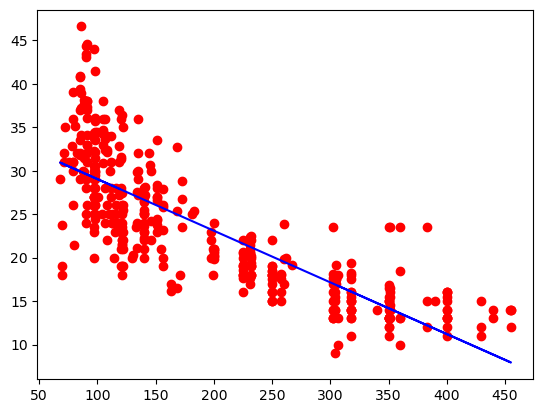

In [65]:
%matplotlib inline
plt.plot(X,Y, "ro")
plt.plot(X, lm.predict(X), color="blue")